In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers.convolutional import Convolution2D,MaxPooling2D

# tf.__version__

Using TensorFlow backend.


The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples (numbers from 0-9 with 6000 sample for each), and a test set of 10,000 examples (1000 sample for wach number). It is a subset of a larger set available from MNIST. The digits have been size-normalized and centered in a fixed-size image (28 x 28).
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

mnist=tf.keras.datasets.mnist

In [2]:
mnist=keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
dir(mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'absolute_import',
 'division',
 'get_file',
 'load_data',
 'np',
 'print_function']

In [4]:
np.shape(x_train)

(60000, 28, 28)

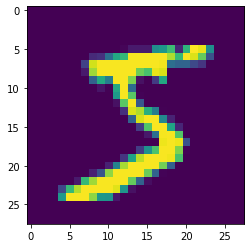

In [5]:
#plotting one of the image
#,cmap=plt.cm.binary will change the plot to black and white
plt.imshow(x_train[0]) 
plt.show()

In [6]:
# show the tensore
print(x_train[0][:10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
# here we normalize data to speed up the optimization time
# axis=1 means normalize on row
x_train=keras.utils.normalize(x_train,axis=1)
x_test=keras.utils.normalize(x_test,axis=1)

In [8]:
np.shape(x_train)

(60000, 28, 28)

1- There are two ways to build Keras models: sequential and functional. The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs

2- Image is a 2-D vector and in fully connected hidden layer(Dense layer)  we need to flat the inputted data 

3- Dense layer is a linear operation in which every input is connected to every output by a weight Generally followed by a non-linear activation function.

The number of the nodes in each dense layer is a hyper parameter (These are the latent features)
The last dense layer should be set to number of the output categories.

4- For the more than two output category softmax activation function is a good choice and we can use logistic activation for binary output.

# reshape x_train and x_test for inputting to the convolution layer. The new dimention can be gray or RGB

In [9]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [11]:
print('x_train shape:', x_train.shape)
print('x_train', x_train.shape[0])
print('x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
x_train 60000
x_test 10000


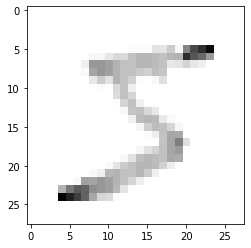

In [12]:
for i in range(0,1):
    image = x_train[i]
    plt.imshow(image[:,:,0], cmap='Greys')
    plt.show()

# CNN Model

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

# model=Sequential()
# model.add(Convolution2D(32,(3,3),input_shape=input_shape)) 
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Convolution2D(64,(3,3),input_shape=input_shape))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Flatten())
# model.add(Activation("relu"))
# model.add(Dense(64))
# model.add(Activation("relu"))
# model.add(Dense(10))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

The most common optimizer for at least start is adam

For the multi categories output sparse_categorical_crossentropy and for binary output binary_categorical_crossentropy are most commons.

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 102s 2ms/step - loss: 0.7115 - accuracy: 0.7824
Epoch 2/3
60000/60000 [==============================] - 108s 2ms/step - loss: 0.2611 - accuracy: 0.9217
Epoch 3/3
60000/60000 [==============================] - 105s 2ms/step - loss: 0.1917 - accuracy: 0.9434


Here we check the model validation for over fitting possibility

In [15]:
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 6s 604us/step
0.14243730412125588 0.9581000208854675


In [16]:
# prediction always take a list
#shape x_test=(10000, 28, 28)
predictions=model.predict([x_test])
np.shape(predictions)

(10000, 10)

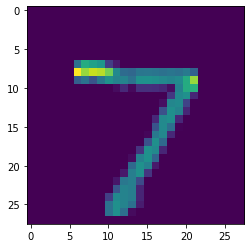

In [17]:
plt.imshow(x_test[0,:,:,0])
plt.show()

In [18]:
print(predictions[0])
print(np.argmax(predictions[0]))

[2.38030353e-07 1.11007245e-10 3.92765796e-05 2.26685355e-04
 6.19401197e-11 3.51885035e-07 5.37138252e-14 9.99730289e-01
 2.50809133e-08 3.15680313e-06]
7
